<a href="https://colab.research.google.com/github/hrithikpurwar/ISHANA/blob/main/ishana22sep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import os 
import numpy as np
import cv2
import json
import matplotlib.pyplot as plt
import math


In [7]:
ans={}

In [8]:
def find_points(start_point, end_point, name):
    '''
    Write your code to find the points ie pixels to connect
    start_point with  end_point. Remember to include both
    the points too. If you are at (x, y) then next possible 
    pixel values are (x+1, y), (x-1, y), (x, y+1), (x, y-1)
    only. Penalty will be awarded if there is a skip or you leave 
    the road. 
    '''
    path= []
    for i in range(start_point[0], end_point[0]):
        path.append([i, start_point[1]])
    for j in range(start_point[1], end_point[1]-1, -1):
        path.append([end_point[0], j])
    img = cv2.imread('/content/drive/MyDrive/Datasets/Ishana/Files/'+name)		# this is read in BGR format
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)		# this converts it into RGB
    rgb_img = cv2.circle(rgb_img, (start_point[0],start_point[1]), 30, (255,255,0), 30)
    rgb_img = cv2.circle(rgb_img, (end_point[0],end_point[1]), 30, (0,255,255), 30)
    rgb_img = cv2.arrowedLine(rgb_img, (start_point[0],start_point[1]), (end_point[0],end_point[1]), (0, 255, 0), thickness=20)
    plt.imshow(rgb_img)
    plt.show()
    return path

In [9]:
filenames= os.listdir('/content/drive/MyDrive/Datasets/Ishana/Files')
imagenames=[]
for file in filenames:
    if file.split('.')[-1] == 'png':
        imagenames.append(file)

In [10]:
imagenames

['Image1.png',
 'Image2.png',
 'Image3.png',
 'Image4.png',
 'Image5.png',
 'Image6.png',
 'Image7.png',
 'Image8.png',
 'Image9.png',
 'Image10.png']

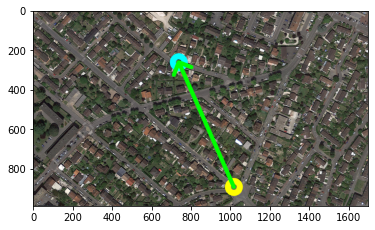

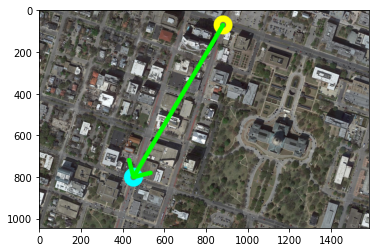

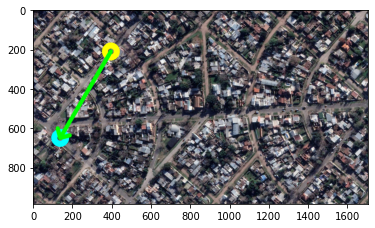

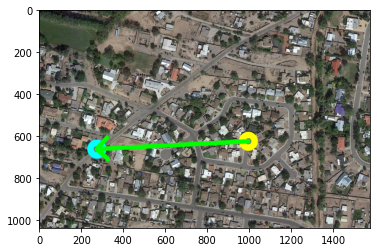

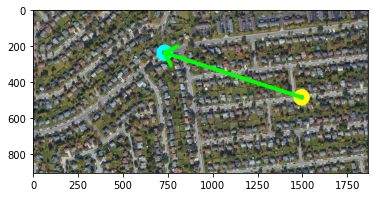

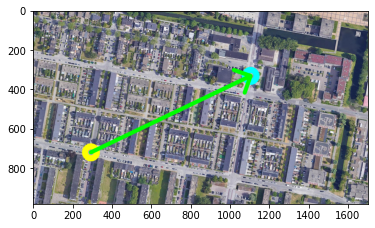

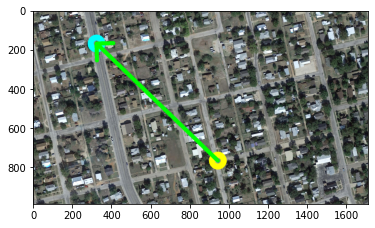

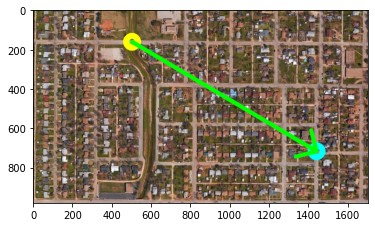

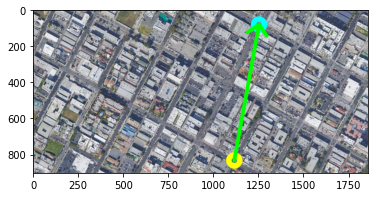

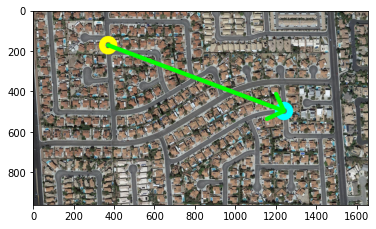

In [11]:
for name in imagenames:
    img= cv2.imread(name)
    json_name= name.split(".")[0]+'.json'
    f = open('/content/drive/MyDrive/Datasets/Ishana/Files/'+json_name)
    data = json.load(f)
    f.close()
    start_point= data['Start']
    end_point= data['End']
    path= find_points(start_point, end_point, name)
    ans[name]= path

In [12]:
json_object = json.dumps(ans, indent = 4)

In [13]:
# Writing to sample.json
with open("Sample Submission.json", "w") as outfile:
    outfile.write(json_object)

In [14]:
def dice_coef_loss(y_true, y_pred):
    return 1-dice_coef(y_true, y_pred)
def dice_loss(y_true, y_pred, smooth=1):
  intersection = K.sum(K.abs(y_true * y_pred), axis=[1,2,3])
  union = K.sum(y_true,[1,2,3])+K.sum(y_pred,[1,2,3])-intersection
  iou = K.mean((intersection + smooth) / (union + smooth), axis=0)
  
  return iou


In [15]:
from keras.models import Model, load_model
model = load_model("/content/drive/MyDrive/Datasets/Ishana/road_segmentation.h5", custom_objects={'dice_coef_loss': dice_coef_loss, 'dice_loss': dice_loss})

In [16]:
image1=cv2.imread('/content/drive/MyDrive/Datasets/Ishana/Files/Image1.png')
image1= np.asarray(image1)
image2=cv2.imread('/content/drive/MyDrive/Datasets/Ishana/Files/Image2.png')
image2= np.asarray(image2)

In [17]:
print(image1.shape)
print(image2.shape)

(988, 1697, 3)
(1044, 1584, 3)


In [18]:
allimage=[]

In [19]:
#reshape 256 x 256
img_width = img_height = 256
num_channels = 3
num_splits = math.floor((image1.shape[0]*image1.shape[1])/(img_width*img_height))
for r in range(0, image1.shape[0], img_height):
  for c in range(0, image1.shape[1], img_width):
    blank_image1 = np.zeros((img_height ,img_width, 3), dtype = int)
    new_image1 = np.array(image1[r:r+img_height, c:c+img_width,:])
    blank_image1[:new_image1.shape[0], :new_image1.shape[1], :] += new_image1
    allimage.append(blank_image1)
num_splits = math.floor((image2.shape[0]*image2.shape[1])/(img_width*img_height))
for r in range(0, image2.shape[0], img_height):
  for c in range(0, image2.shape[1], img_width):
    blank_image2 = np.zeros((img_height ,img_width, 3), dtype = int)
    new_image2 = np.array(image2[r:r+img_height, c:c+img_width,:])
    blank_image2[:new_image2.shape[0], :new_image2.shape[1], :] += new_image2
    allimage.append(blank_image2)



In [20]:
allimage= np.asarray(allimage)

In [21]:
allimage

array([[[[ 15,  15,  15],
         [ 16,  16,  16],
         [ 16,  16,  16],
         ...,
         [ 16,  16,  16],
         [ 16,  16,  16],
         [ 16,  16,  16]],

        [[ 81, 100, 104],
         [ 88, 107, 111],
         [ 86, 105, 110],
         ...,
         [ 64,  86,  71],
         [ 71,  92,  81],
         [ 72,  93,  87]],

        [[ 77,  91,  97],
         [ 84,  99, 105],
         [ 76,  92,  98],
         ...,
         [ 59,  83,  67],
         [ 66,  89,  77],
         [ 64,  86,  78]],

        ...,

        [[101, 105, 104],
         [101, 102, 100],
         [ 47,  45,  44],
         ...,
         [ 69,  70,  73],
         [ 28,  29,  32],
         [104, 105, 109]],

        [[ 85,  88,  86],
         [ 24,  23,  21],
         [ 27,  24,  23],
         ...,
         [183, 184, 188],
         [102, 103, 107],
         [ 56,  57,  61]],

        [[ 19,  20,  18],
         [ 17,  15,  13],
         [ 59,  56,  52],
         ...,
         [198, 199, 203],
        

In [22]:
allimage.shape

(63, 256, 256, 3)

In [23]:
prediction = model.predict(allimage, verbose=1)

2/2 [==============================] - 37s 3s/step


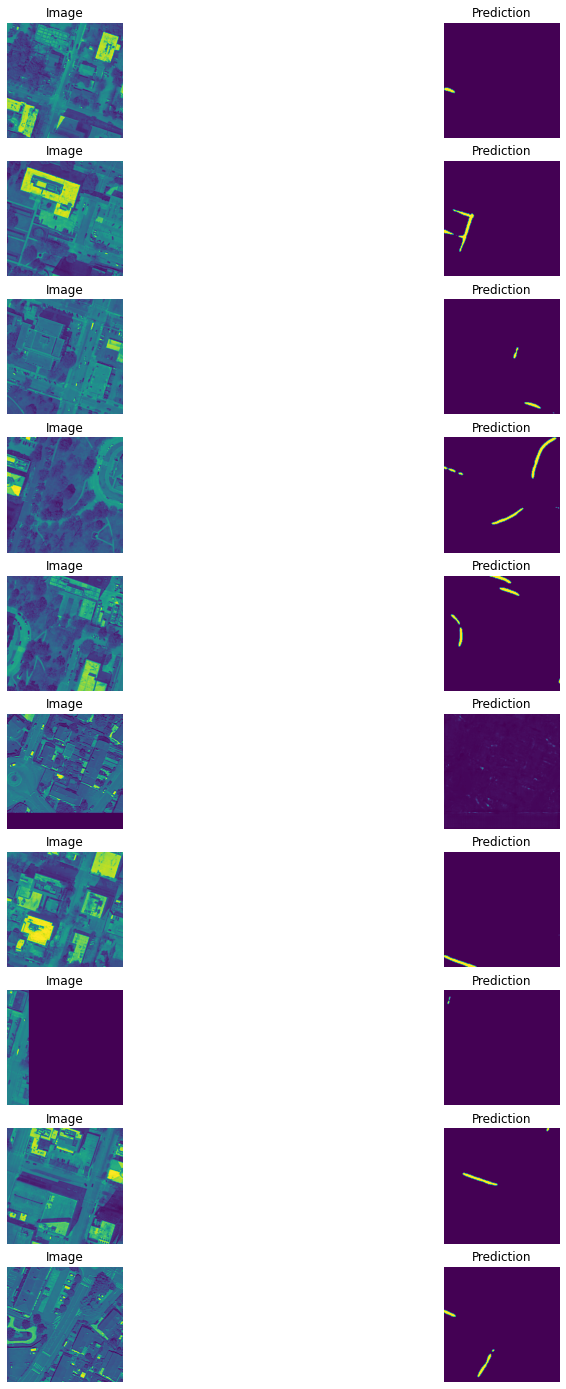

In [24]:
import random
from matplotlib.pyplot import *
ix = random.randint(0, len(prediction))
num_samples = 10

f = plt.figure(figsize = (15, 25))
for i in range(1, num_samples*4, 4):
  ix = random.randint(0, len(prediction))

  f.add_subplot(num_samples, 4, i)
  imshow(allimage[ix][:,:,0])
  plt.title("Image")
  plt.axis('off')

  f.add_subplot(num_samples, 4, i+2)
  imshow(np.squeeze(prediction[ix][:,:,0]))
  plt.title("Prediction")
  plt.axis('off')

plt.show()


In [36]:
from keras.preprocessing.image import load_img, img_to_array
test1 = load_img('/content/drive/MyDrive/Datasets/Ishana/Files/Image1.png', target_size=(256, 256))

In [37]:
test1=np.asarray(test1)

In [38]:
test1.shape

(256, 256, 3)

In [39]:
test1

array([[[100,  94,  75],
        [167, 158, 143],
        [186, 177, 162],
        ...,
        [118, 108, 109],
        [ 91,  81,  80],
        [134, 124, 123]],

       [[ 90,  81,  68],
        [166, 157, 142],
        [172, 163, 148],
        ...,
        [239, 234, 233],
        [ 80,  69,  73],
        [130, 125, 121]],

       [[122, 115, 107],
        [168, 156, 142],
        [180, 168, 154],
        ...,
        [126, 147, 181],
        [151, 141, 134],
        [ 39,  34,  32]],

       ...,

       [[111, 102,  93],
        [128, 122, 112],
        [ 91,  82,  80],
        ...,
        [214, 219, 219],
        [ 88,  88,  73],
        [124, 115, 112]],

       [[122, 114, 104],
        [131, 128, 121],
        [104, 100,  97],
        ...,
        [ 99,  98,  94],
        [114, 112, 106],
        [120, 118, 116]],

       [[113, 109, 102],
        [ 89,  85,  81],
        [ 37,  32,  34],
        ...,
        [113, 112, 110],
        [119, 115, 114],
        [128, 124, 122]]

In [40]:
test2 = load_img('/content/drive/MyDrive/Datasets/Ishana/Files/Image2.png', target_size=(256, 256))

In [41]:
test2=np.asarray(test2)

In [42]:
test2.shape

(256, 256, 3)

In [43]:
test_full=[]

In [44]:
test_full.append(test1)

In [45]:
test_full.append(test2)

In [47]:
test_full=np.asarray(test_full)

In [48]:
test_full.shape

(2, 256, 256, 3)

In [49]:
testprediction = model.predict(test_full, verbose=1)

1/1 [==============================] - 1s 1s/step


IndexError: ignored

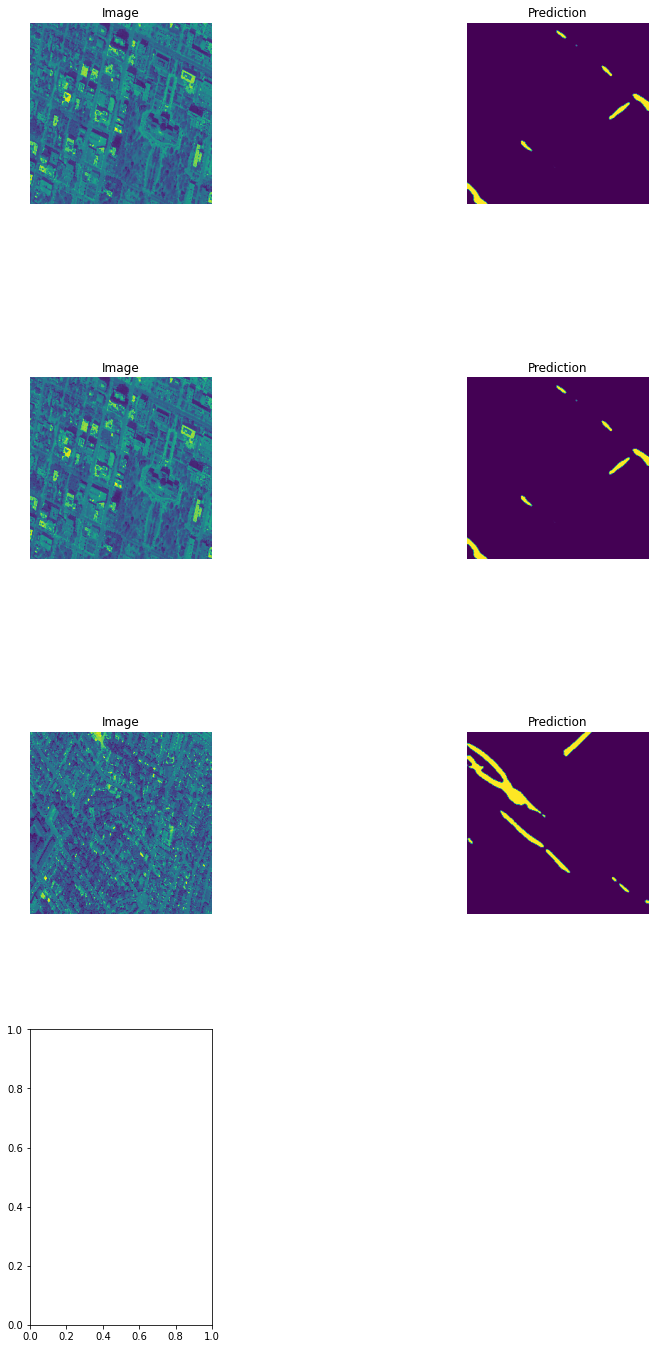

In [52]:
import random
from matplotlib.pyplot import *
ix = random.randint(0, len(testprediction))
num_samples = 4

f = plt.figure(figsize = (15, 25))
for i in range(1, num_samples*4, 4):
  ix = random.randint(0, len(testprediction))

  f.add_subplot(num_samples, 4, i)
  imshow(test_full[ix][:,:,0])
  plt.title("Image")
  plt.axis('off')

  f.add_subplot(num_samples, 4, i+2)
  imshow(np.squeeze(prediction[ix][:,:,0]))
  plt.title("Prediction")
  plt.axis('off')

plt.show()